In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder


# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import chart_studio.plotly as py


#Geographical Plotting
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster


# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs



# Disable warnings 
import warnings
warnings.filterwarnings('ignore')





## Reading the data set

In [2]:
df = pd.read_csv("penguin.csv")

In [3]:
df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

## Cleaning the data

In [5]:
# drop the unessary columns
df.drop(["studyName","Sample Number","Region","Stage","Individual ID","Clutch Completion","Date Egg", "Delta 15 N (o/oo)","Delta 13 C (o/oo)","Delta 13 C (o/oo)","Comments"], axis=1, inplace= True)

In [6]:
df

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo penguin (Pygoscelis papua),Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo penguin (Pygoscelis papua),Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo penguin (Pygoscelis papua),Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo penguin (Pygoscelis papua),Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Clean the Specie column

In [7]:
df.Species.unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

In [8]:
df["Species"]= df["Species"].str.replace("(Pygoscelis adeliae)","")
df["Species"]= df["Species"].str.replace(" (Pygoscelis antarctica)","")
df["Species"]= df["Species"].str.replace("(Pygoscelis papua)","")
df["Species"]= df["Species"].str.replace("(Pygoscelis antarctica)","")

In [9]:
df.Species.unique()

array(['Adelie Penguin ()', 'Chinstrap penguin ()', 'Gentoo penguin ()'],
      dtype=object)

In [10]:
df["Species"]= df["Species"].str.replace("Penguin ","")
df["Species"]= df["Species"].str.replace("penguin ","")
df["Species"]= df["Species"].str.replace("(","")
df["Species"]= df["Species"].str.replace(")","")

In [11]:
df.Species.unique()

array(['Adelie ', 'Chinstrap ', 'Gentoo '], dtype=object)

In [12]:
df

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [13]:
# rename the columns
df.columns = ["species","island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","sex"]

In [14]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## Understanding the data

In [15]:
print(df.shape)

(344, 7)


In [16]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


## Covariance & Correlation
“Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables

In [17]:
# Covariance

print('Covariance:')
df.cov()

Covariance:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [18]:
print('Correlation:')
df.corr()

Correlation:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


## Missing values

In [19]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [20]:
missing= missing_values_table(df)
missing

Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,10,2.9
culmen_length_mm,2,0.6
culmen_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


In [21]:
# Handling missing values

from sklearn.impute import SimpleImputer
#setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
df.iloc[:,:] = imputer.fit_transform(df)

In [22]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Convert sex column to integer values

In [23]:
lb = LabelEncoder()
df["sex"] = lb.fit_transform(df["sex"])
df.sex

0      2
1      1
2      1
3      2
4      1
      ..
339    2
340    1
341    2
342    1
343    2
Name: sex, Length: 344, dtype: int32

## Visual Analysis

In [24]:
df['species'].value_counts()

Adelie        152
Gentoo        124
Chinstrap      68
Name: species, dtype: int64

## Box plot
The box plot of the dataset,will show us the visual representation of how our data is scattered over the the plane

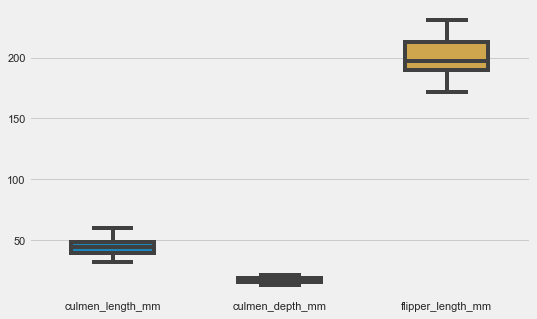

In [25]:
df1 = df[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm']]
sns.boxplot(data=df1, width=0.5,fliersize=5)

## Scatterplot

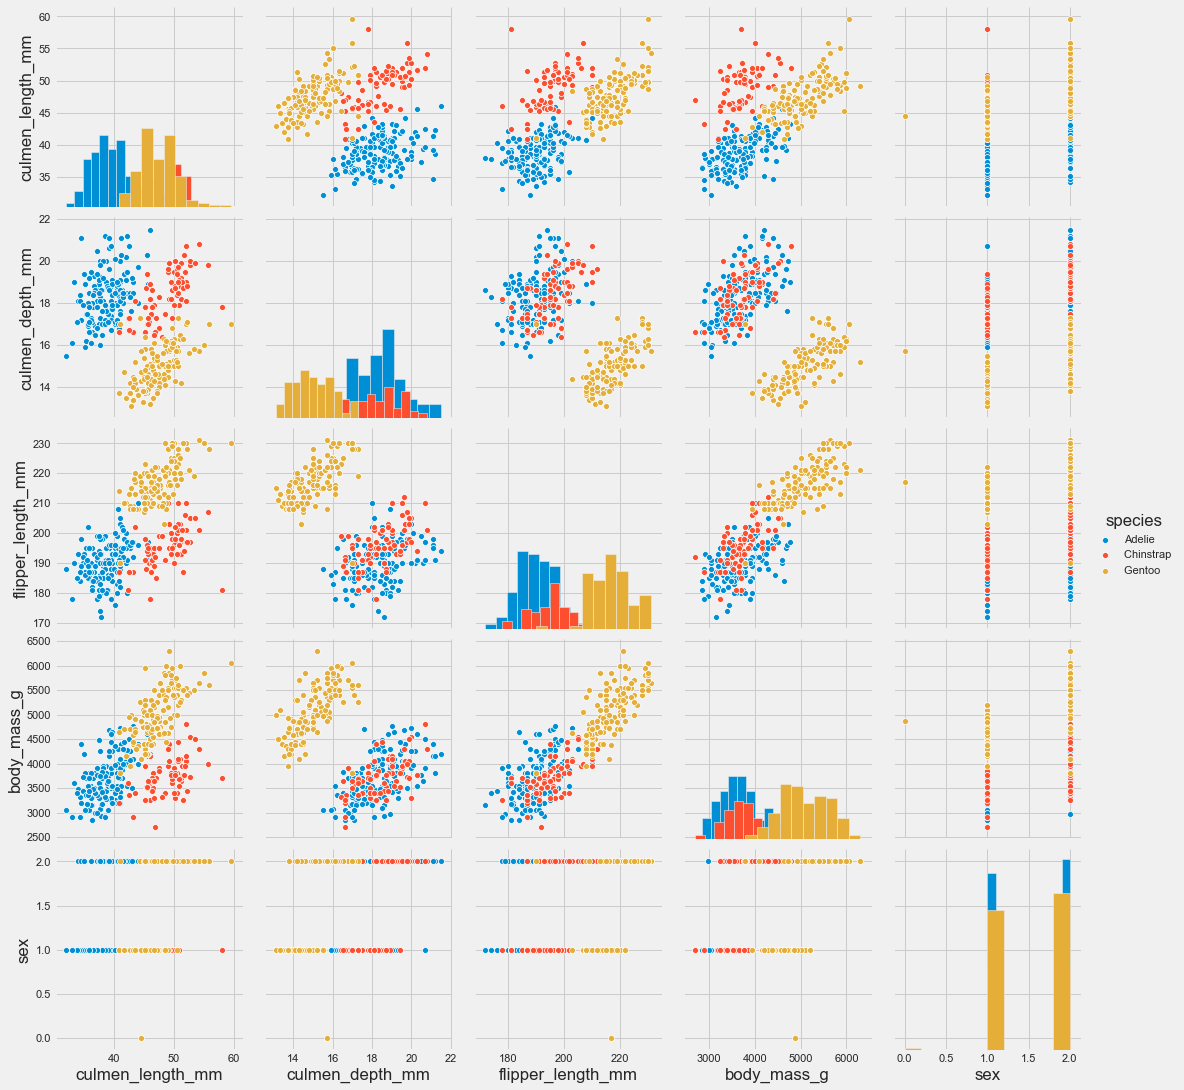

In [26]:
sns.pairplot(df, hue="species", height=3,diag_kind="hist")

## culmen_depth vs culmen_length

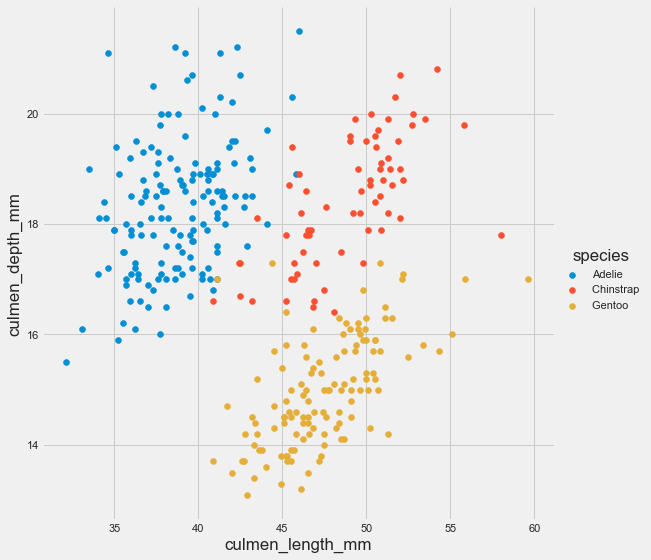

In [27]:
sns.FacetGrid(df, hue="species", height=8) \
   .map(plt.scatter, "culmen_length_mm", "culmen_depth_mm") \
   .add_legend()

## culmen_length vs flipperlength

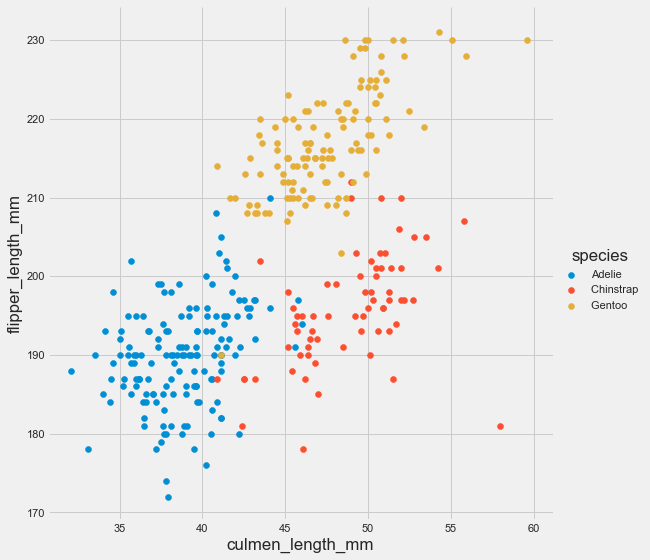

In [28]:
sns.FacetGrid(df, hue="species", size=8) \
   .map(plt.scatter, "culmen_length_mm", "flipper_length_mm") \
   .add_legend()

## culmen_depth vs flipperlength

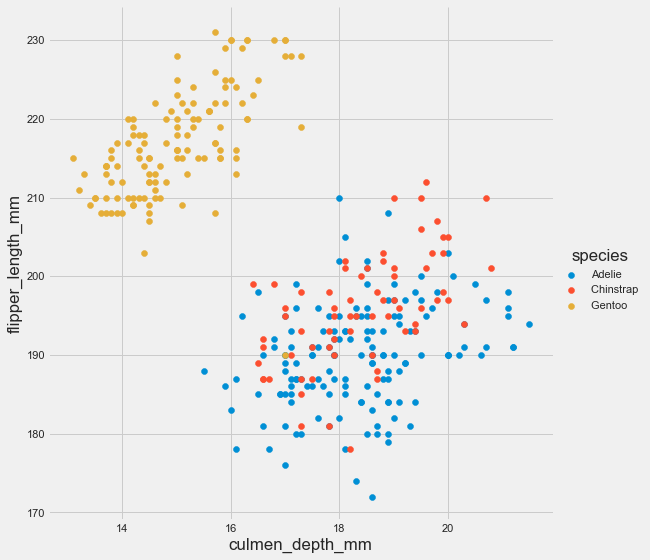

In [29]:
sns.FacetGrid(df, hue="species", size=8) \
   .map(plt.scatter, "culmen_depth_mm", "flipper_length_mm") \
   .add_legend()

## Flipperlength distribution

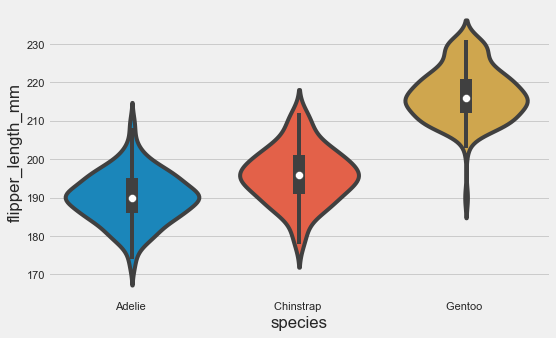

In [30]:
ax = sns.violinplot(x="species", y="flipper_length_mm", data=df,height=10)

## KDEPlot

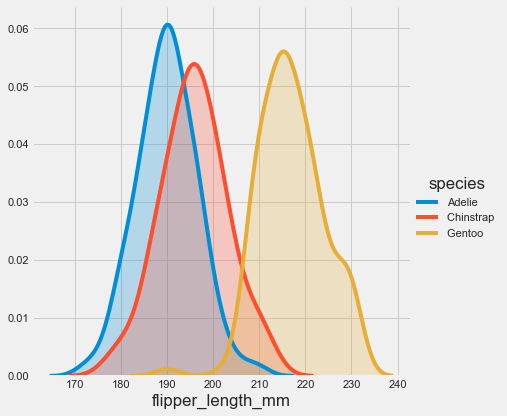

In [31]:
sns.FacetGrid(df, hue="species", height=6,) \
   .map(sns.kdeplot, "flipper_length_mm",shade=True) \
   .add_legend()

## Flipperlength vs body mass

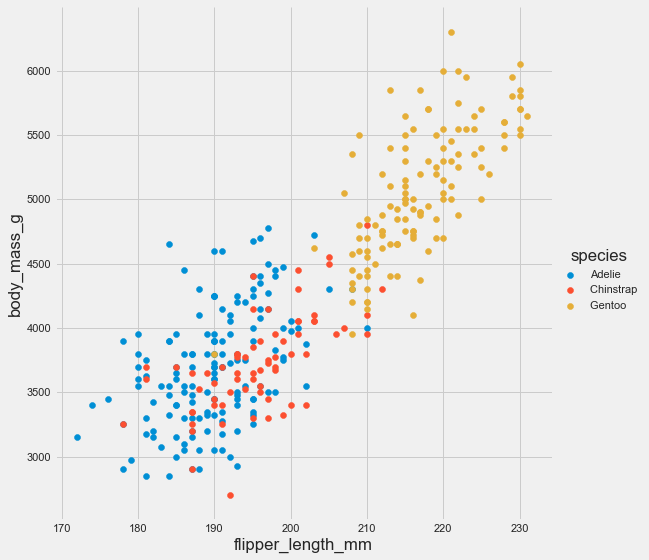

In [32]:
sns.FacetGrid(df, hue="species", height=8) \
   .map(plt.scatter, "flipper_length_mm", "body_mass_g") \
   .add_legend()

In [33]:
df.sex.unique()

array([2, 1, 0])

In [34]:
df.to_csv("penguin_clean.csv", index=False)

In [35]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,41.1,17.0,190.0,3800.0,2
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


In [36]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,41.1,17.0,190.0,3800.0,2
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


### Use label encoder on the island and specie column

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
dfle = df

In [39]:
le = LabelEncoder()

In [40]:
dfle['SpeciesT']=le.fit_transform(dfle.species)

In [41]:
dfle['Island']=le.fit_transform(dfle.island)

In [42]:
dfle

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,SpeciesT,Island
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2,0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1,0,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1,0,2
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2,0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1,0,2
...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,41.1,17.0,190.0,3800.0,2,2,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1,2,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2,2,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1,2,0


In [43]:
X = dfle.drop(['species','SpeciesT', 'island'], axis = 1)

In [44]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Island
0,39.1,18.7,181.0,3750.0,2,2
1,39.5,17.4,186.0,3800.0,1,2
2,40.3,18.0,195.0,3250.0,1,2
3,41.1,17.0,190.0,3800.0,2,2
4,36.7,19.3,193.0,3450.0,1,2
...,...,...,...,...,...,...
339,41.1,17.0,190.0,3800.0,2,0
340,46.8,14.3,215.0,4850.0,1,0
341,50.4,15.7,222.0,5750.0,2,0
342,45.2,14.8,212.0,5200.0,1,0


In [45]:
y = dfle.SpeciesT

In [46]:
y

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: SpeciesT, Length: 344, dtype: int32

In [47]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [48]:
# use dabl to find the best model
import dabl
ec = dabl.SimpleClassifier(random_state=0).fit(dfle, target_col="species") 

Running DummyClassifier(strategy='prior')
accuracy: 0.442 recall_macro: 0.333 precision_macro: 0.147 f1_macro: 0.204
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.442 recall_macro: 0.333 precision_macro: 0.147 f1_macro: 0.204

Running GaussianNB()
accuracy: 1.000 recall_macro: 1.000 precision_macro: 1.000 f1_macro: 1.000
=== new best GaussianNB() (using recall_macro):
accuracy: 1.000 recall_macro: 1.000 precision_macro: 1.000 f1_macro: 1.000

Running MultinomialNB()
accuracy: 1.000 recall_macro: 1.000 precision_macro: 1.000 f1_macro: 1.000
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.593 recall_macro: 0.667 precision_macro: 0.461 f1_macro: 0.517
Running DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 1.000 recall_macro: 1.000 precision_macro: 1.000 f1_macro: 1.000
Running DecisionTreeClassifier(class_weight='balanced', min_impurity_decrease=0.01)
accuracy: 1.000 recall_macro: 1.000 precision_m